# Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset with images

In [4]:
mnist = tf.keras.datasets.mnist
(images_train, labels_train),(images_test, labels_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Labels for classification

In [6]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Display image of example

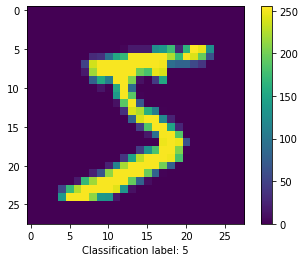

In [12]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel('Classification label: {}'.format(labels_train[0]))
plt.show()

# Normalize data (Images)

In [13]:
images_train = images_train / 255.0
images_test = images_test / 255.0

# Training Model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(images_train, labels_train, epochs=16)

Epoch 1/16
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3545 - accuracy: 0.8929
Epoch 2/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1071 - accuracy: 0.9654
Epoch 3/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0789 - accuracy: 0.9750
Epoch 4/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0612 - accuracy: 0.9804
Epoch 5/16
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0581 - accuracy: 0.9808
Epoch 6/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0485 - accuracy: 0.9841
Epoch 7/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0428 - accuracy: 0.9859
Epoch 8/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0398 - accuracy: 0.9880
Epoch 9/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0378 - accuracy: 0.9884
Epoch 10/16
1875/1875 [==============================] - 13s 7ms/step - l

# Evaluate Model

In [17]:
  test_loss, test_acc = model.evaluate(images_test, labels_test)
  print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0945 - accuracy: 0.9817
Test accuracy:  0.9817000031471252


# Save Model

In [18]:
keras_file = "digit.h5"
tf.keras.models.save_model(model, keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("digit.tflite", "wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp1apf2tc_/assets


2680928